# Logistic Regression in Machine Learning

Logistic Regression is a **supervised machine learning algorithm** used for classification problems. 

Unlike linear regression which predicts continuous values it predicts the probability that an input belongs to a specific class.

It is used for binary classification where the output can be one of two possible categories such as 
> Yes/No
> 
> True/False
> 
> 0/1.

It uses sigmoid function to convert inputs into a probability value between 0 and 1. In this article, we will see the basics of logistic regression and its core concepts.

Base for Alogrithms :
> NBC (naive bayes classifier)
>
> KNN (K - Nearest Neighbour)
>
> DT (Decision Tress)
>
> RF (Random Forest)

Steps :
 > Data **->** convert to 0 and 1 **->** log(odds) (to convert data b/w +inf to -inf ) **->** Sigmoid Func **->** (get probability value) 

Sigmoid Function :

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

we convert linear equation into sigmoid function :

$y = mx + c$ $\qquad$ => $\qquad$ $\sigma(\mathbf{x}) = \frac{1}{1 + e^{-\left(m_1 x_1 + m_2 x_2 + m_3 x_3 + \cdots + m_n x_n + b\right)}}$



to calculate $m_1, m_2,m_3....$ need to use MLE(Maximum Likelihood Estimation)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### Dataset

In [6]:
week_data = [1,2,3,4,5]
sales_data = [2,4,5,4,5]

df =  pd.DataFrame({"Week": week_data, "Sales":sales_data})
df

,Week,Sales
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [14]:
''' Divide the data into 2 parts 
1. Independent Variable 
2. Target Varibale
'''

X = df['Week'].values
Y = df['Sales'].values

In [15]:
X

array([1, 2, 3, 4, 5])

In [16]:
Y

array([2, 4, 5, 4, 5])

# Linear Regression

In [19]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
print(mean_x)
print(mean_y)

3.0
4.0


In [24]:
numr = 0
den = 0
for i in range(len(X)):
    numr += (X[i]-mean_x)*(Y[i]-mean_y)
    den += (X[i]-mean_x)**2

m = numr/den # slop
''' 
We know  y = mx + c
so c = y-mx
'''
c = mean_y - m*mean_x

print(m)
print(c)

0.6
2.2


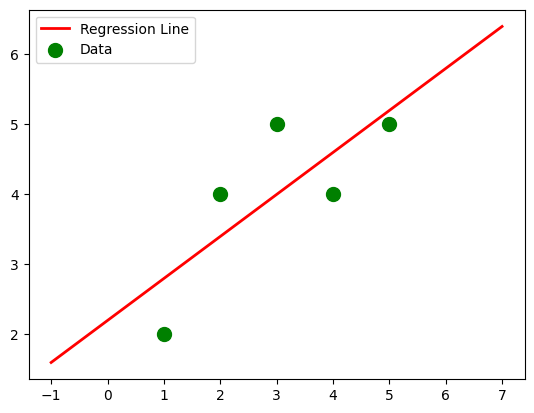

In [36]:
# ploit the line :

max_x = np.max(X) + 2
min_x = np.min(X) - 2


x = np.linspace(min_x, max_x)
y = c + m*x

plt.plot(x, y, color='red', label="Regression Line", linewidth=2)
plt.scatter(X, Y, color='green', label="Data", s=100)
plt.legend(loc='best') 

In [37]:
# R^2

ss_tot = 0
ss_res = 0

for i in range(len(X)):
    y_pred = c + m*X[i]
    ss_tot += (Y[i] - mean_y)**2
    ss_res += (Y[i] - y_pred)**2

r2 = 1 - (ss_res/ss_tot)
r2    

np.float64(0.6000000000000001)

In [43]:
# RMS (Root mean square error)
rmse = 0 
for i in range(len(X)):
    y_pred = c + m*X[i]
    rmse += (y_pred - Y[i])**2

rmse = np.sqrt(rmse/len(X))
rmse

np.float64(0.6928203230275508)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
X = X.reshape(len(X),1)
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [59]:
model = LinearRegression()

model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
y_pred = c + m*X
rmse = mean_squared_error(Y, y_pred)
r2_score = model.score(X,Y)
r2_score

0.6000000000000001

In [64]:
np.sqrt(rmse)

np.float64(0.6928203230275508)

### Real world Dataset

In [77]:
import kagglehub
import os
from sklearn.model_selection import train_test_split

In [69]:
path = kagglehub.dataset_download("anubhabswain/brain-weight-in-humans")
files = os.listdir(path)
df = pd.read_csv(os.path.join(path, "dataset.csv"))
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [71]:
X = df["Head Size(cm^3)"].values
Y = df["Brain Weight(grams)"].values

In [75]:
X = X.reshape(-1,1)

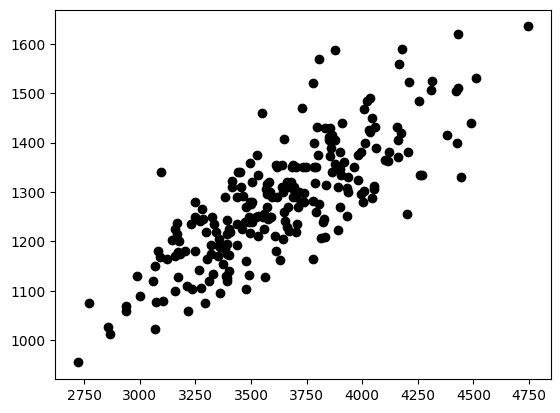

In [102]:
plt.scatter(X,Y, color="black")

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2) 

In [84]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
y_pred = lr_model.predict(x_test)
y_pred

array([1284.02274835, 1201.09202056, 1225.99691404, 1319.45445248,
       1179.26814483, 1084.526849  , 1254.75307972, 1344.35934596,
       1266.0501448 , 1249.36129865, 1374.39926903, 1311.49515662,
       1116.6207839 , 1267.59065368, 1220.3483815 , 1190.56520991,
       1253.98282528, 1219.32137559, 1119.44505017, 1370.80474832,
       1177.98438743, 1320.99496135, 1223.68615073, 1337.6838075 ,
       1366.43997318, 1377.48028678, 1220.60513298, 1247.5640383 ,
       1194.4164821 , 1358.99418028, 1390.8313637 , 1333.83253532,
       1202.37577796, 1389.29085483, 1209.82157085, 1567.98988436,
       1350.26462999, 1333.57578384, 1384.92607968, 1485.05915657,
       1337.94055898, 1269.90141699, 1262.96912705, 1385.43958264,
       1242.42900871, 1260.14486078, 1256.29358859, 1417.53351754])

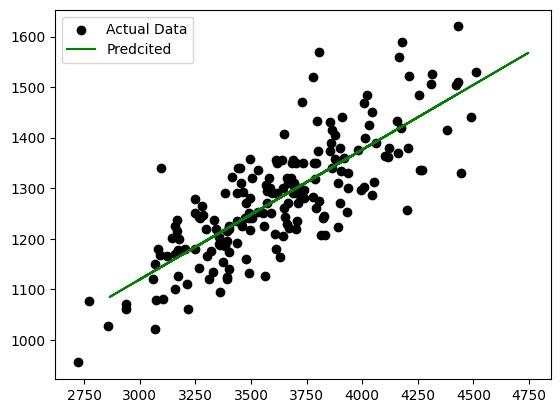

In [91]:
plt.scatter(x_train, y_train, color = 'black', label= "Actual Data")
plt.plot(x_test, y_pred, color = 'green', label="Predcited")
plt.legend()

In [100]:
R2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("r2 Score :",R2_score)
print("RMSE :", rmse)

r2 Score : 0.6388896636148731
RMSE : 78.80427739859134


> Gnerally in Linear regression we check the model is good if RMSE is less
>
> But in Logestic Regression we use Confusion metric

# Logestic Regression

In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. DataSet

In [22]:
path = kagglehub.dataset_download("raminhuseyn/hr-analytics-data-set")
files = os.listdir(path)
df = pd.read_csv(os.path.join(path, "HR_capstone_dataset.csv"))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
df.shape

(14999, 10)

### 2. Analyse the dataset

for best feature to select for our model

In [25]:
'''
For our model we will focus on the attrition  rate of the company  (Employee who left the company)

Select the features which affects the attrition.

lets analyse
think as what can be the factors by which employees might leave the company 
'''

'\nFor our model we will focus on the attrition  rate of the company  (Employee who left the company)\n\nSelect the features which affects the attrition.\n\nlets analyse\nthink as what can be the factors by which employees might leave the company \n'

In [35]:
# attrition

left = df[df.left == 1]
retained = df[df.left==0]
print(f"Total number of employess : {df.shape}")
print(f"No. of employees who left : {left.shape}")
print(f"No. of employees who are in company : {retained.shape}")

Total number of employess : (14999, 10)
No. of employees who left : (3571, 10)
No. of employees who are in company : (11428, 10)


In [40]:
# Probability for employees who left 
left_prob = 3571/14999*100
left_prob 

23.80825388359224

In [42]:
df.groupby("left").mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [43]:
# We can observe :
# satisfaction_level of people who left compared to other exployees is low
# No. of project is higher for employees who left
# average_montly_hours is high 
# time_spend_company is high 
# Work_accident is low 
# promotion_last_5years  is very less for employees who left the company.

# we can comcluted that this are the factorys why employees left the company. There can be other factors as well as we only analyes the numerical data.
# lets analyes othere features as well.

<Axes: xlabel='salary'>

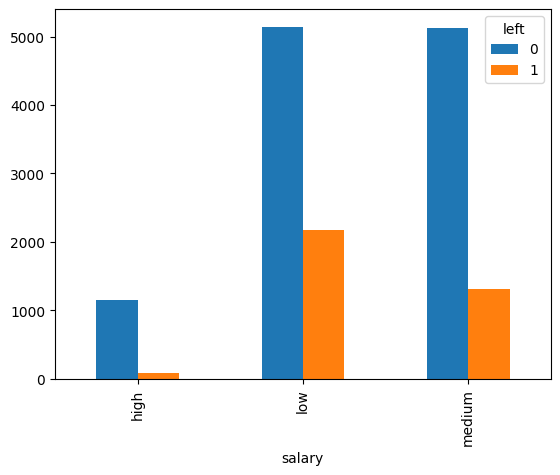

In [46]:
# salary on reteltion

pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='Department'>

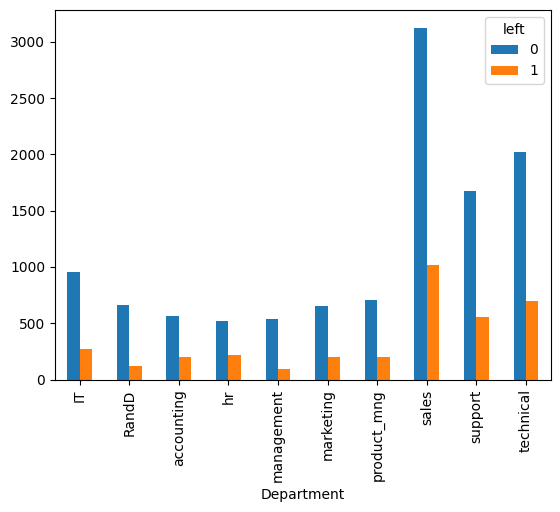

In [51]:
# Analyese the Departmet
pd.crosstab(df.Department, df.left).plot(kind='bar')

In [52]:
# From above we can observe 

# 1. the exployees whos salary is low, left the company most.
# 2. Exployees who belong the Sales Department left the company most

In [56]:
# We will choose most 4 valubale features 
# 1.satisfaction_level 2.time_spend_company 3.promotion_last_5years 4.Salary


subdf = df[['satisfaction_level','time_spend_company','promotion_last_5years','salary']]
subdf

,satisfaction_level,time_spend_company,promotion_last_5years,salary
0,0.38,3,0,low
1,0.80,6,0,medium
2,0.11,4,0,medium
3,0.72,5,0,low
4,0.37,3,0,low
...,...,...,...,...
14994,0.40,3,0,low
14995,0.37,3,0,low
14996,0.37,3,0,low
14997,0.11,4,0,low


In [ ]:
# Now cant directly put this data into machine learnig as Salary is a string type.
# we have to convert the string into numberical value.
# we will use encoding technique.

In [58]:

'''
    For this we will use one_hot_encoding
    Salary has three values 
    1. low     0
    2. medium  1
    3. high   2
    # this will cause weighted issue so we will use one hot encoding


    in one hot encoing values will become 

    1. low     001
    2. medium  010
    3. high    100
'''

'\n    For this we will use one_hot_encoding\n    Salary has three values \n    1. low     0\n    2. medium  1\n    3. high   2\n    # this will cause weighted issue so we will use one hot encoding\n\n\n    in one hot encoing values will become \n\n    1. low     001\n    2. medium  010\n    3. high    100\n'

In [74]:
salary_dummies = pd.get_dummies(subdf.salary, prefix='salary').astype(int)
salary_dummies.head(5)

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [72]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')
df_with_dummies.head(5)

,satisfaction_level,time_spend_company,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,3,0,low,0,1,0
1,0.80,6,0,medium,0,0,1
2,0.11,4,0,medium,0,0,1
3,0.72,5,0,low,0,1,0
4,0.37,3,0,low,0,1,0


In [73]:
# now remove the unwanted column salary (as we already have converted the to numberical value)

df_with_dummies.drop('salary', axis='columns', inplace= True)
df_with_dummies.head(5)

,satisfaction_level,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,3,0,0,1,0
1,0.80,6,0,0,0,1
2,0.11,4,0,0,0,1
3,0.72,5,0,0,1,0
4,0.37,3,0,0,1,0


In [76]:
# Lets devide this into X(Features) and Y(Target) form
x = df_with_dummies
y = df.left

In [78]:
x.head(5)

,satisfaction_level,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,3,0,0,1,0
1,0.80,6,0,0,0,1
2,0.11,4,0,0,0,1
3,0.72,5,0,0,1,0
4,0.37,3,0,0,1,0


In [79]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### model to impliment

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [94]:
model = LogisticRegression()

In [95]:
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [97]:
# Lets test the mode 

In [100]:
x_test[20:21]

,satisfaction_level,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
2105,0.71,2,0,0,0,1


In [104]:
y_test[23:30]

12011    1
9536     0
8288     0
6002     0
3335     0
10482    0
12559    1
Name: left, dtype: int64

In [105]:
model.predict(x_test[23:30])

array([1, 1, 0, 0, 0, 0, 1])

In [125]:
model.predict_proba(x_test[23:30])

array([[0.2893161 , 0.7106839 ],
       [0.48271576, 0.51728424],
       [0.94245879, 0.05754121],
       [0.79579596, 0.20420404],
       [0.8598559 , 0.1401441 ],
       [0.81669176, 0.18330824],
       [0.2893161 , 0.7106839 ]])

In [107]:
model.score(x_test, y_test)

0.78

In [109]:
y_pred = model.predict(x_test)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2290
           1       0.57      0.27      0.37       710

    accuracy                           0.78      3000
   macro avg       0.69      0.60      0.62      3000
weighted avg       0.75      0.78      0.75      3000



In [113]:
'''
Since accuracy is good almost 78% 
but a issue still persist.
for this dataset we are more focused why employeer are leaving the company.
but for our mode as show above report, we can observe that 
for 0 (employees who are still working in company) its precision and recall is good, but
1 (employees  who left the company) its precision and recall is bad.
and from our understanding this model is mode not good to predict why people are leaving the company.
'''

'\nSince accuracy is good almost 78% \nbut a issue still persist.\nfor this dataset we are more focused why employeer are leaving the company.\nbut for our mode as show above report, we can observe that \nfor 0 (employees who are still working in company) its precision and recall is good, but\n1 (employees  who left the company) its precision and recall is bad.\nand from our understanding this model is mode not good to predict why people are leaving the company.\n'

In [115]:
from sklearn.metrics import roc_auc_score, roc_curve

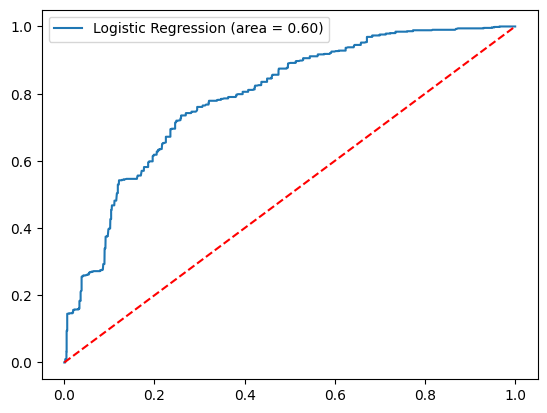

In [124]:
logreg_roc_auc_score = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %.2f)' % logreg_roc_auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.legend(loc='best')